<a href="https://colab.research.google.com/github/hahngyuri/AR-project/blob/main/ANT05010_AATG010_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ANT5010/AATG010 Assignment 1**

### **Due date: April, 3. - April, 10.**


Please upload this assignment template on your Colab notebook and write your Python code.

After completing your code, please download the notebook file and submit it on Cyber Campus.

Name the file using the following template: **{student_number}_assignment1.ipynb**.

For example, if your student number is 21045230, the file name should be **21045230_assignment1.ipynb**.

**Note**
1. If the file name does not follow the template, 5 points will be deducted.
2. Partial points may be awarded based on the code written for each problem.

---
# **Problem 1. Vibration signal with VAE (10 points)**

Mechanical systems invariably exhibit vibrations during their operation. Consequently, vibration analysis stands as one of the foremost and traditional methods for diagnosing mechanical systems. However, since the vibration signal usually is high dimensional data, we need dimension reduction for applications.

<br>

__Data information__
- File format: npy
- Information: signal, label
- Sampling rate: 12,800 Hz
- File length (time): 0.78 sec
- Labels
  - 0 (Normal)
  - 1 (Abnormal)

<br>

Download the datasets
- [rotating machinery data](https://drive.google.com/file/d/109saAcTHkZMSEwGuOEJiadzl04naIOYl/view?usp=sharing)
- [rotating machinery label](https://drive.google.com/file/d/1XqH57B-fMwIXaAdSMmzp2qNd1js4-VK1/view?usp=sharing)

<br>

**Please download them and upload on Colab to write your Python code**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [ ]:
## data load
# please consider your data path
signal = np.load('./sample_data/rotating_machinery_signal.npy')
label = np.load('./sample_data/rotating_machinery_label.npy')

print(signal.shape)
print(label.shape)

(2000, 10000)
(2000,)


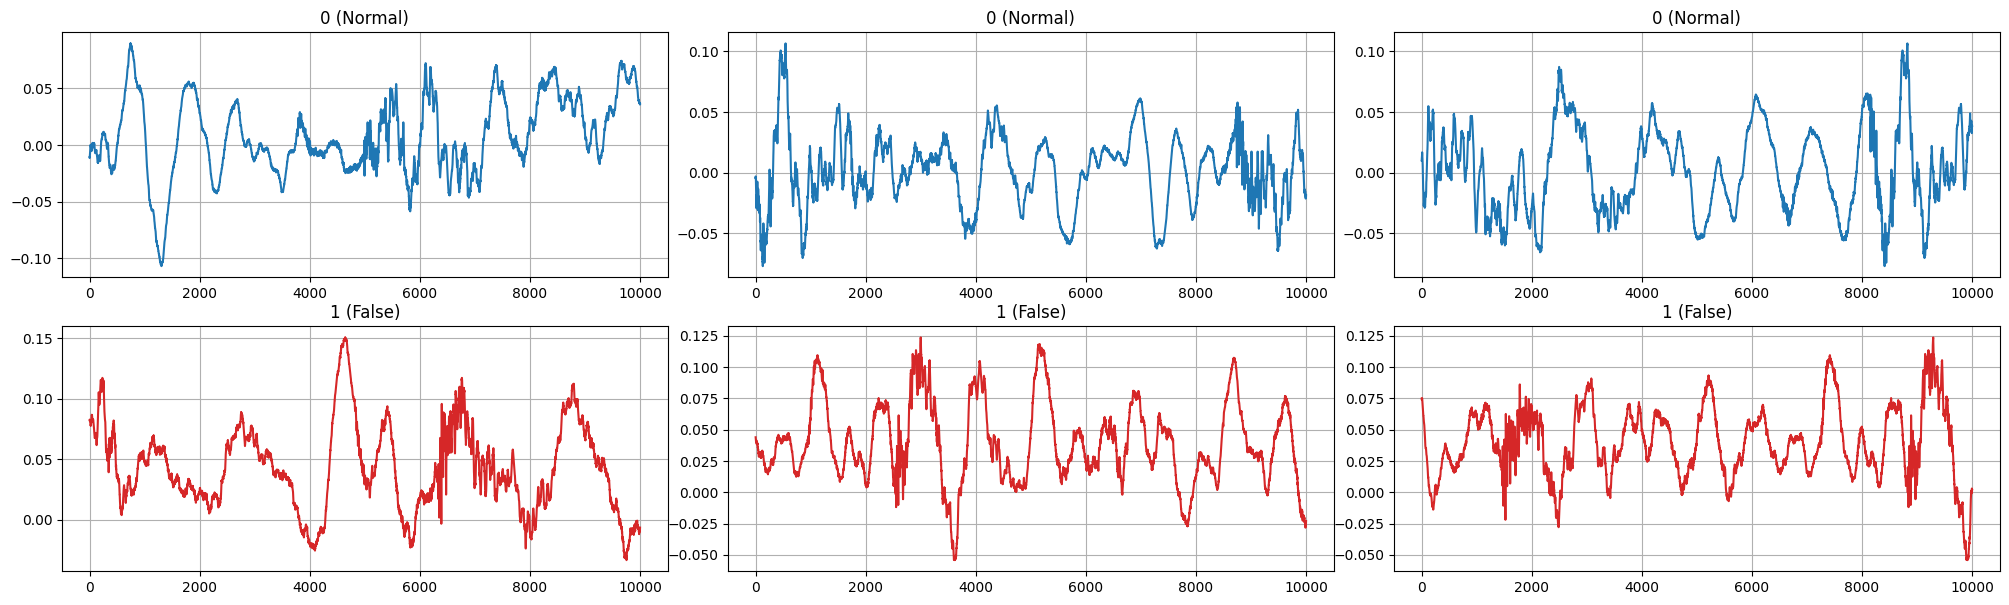

In [ ]:
# visualization
gs = gridspec.GridSpec(2,3, wspace=0.1,hspace=0.2)

plt.figure(figsize=(25,7))
for i in range(3):
  normal_index = np.random.choice(np.where(label==0)[0], (1,))[0]
  abnormal_index = np.random.choice(np.where(label==1)[0], (1,))[0]

  plt.subplot(gs[0,i])
  plt.plot(signal[normal_index], color='C0')
  plt.title('0 (Normal)')
  plt.grid(True)

  plt.subplot(gs[1,i])
  plt.title('1 (False)')
  plt.plot(signal[abnormal_index], color='C3')
  plt.grid(True)
plt.show()

### 01. Build your variational autoencoder with 2 dimensional latent space ($z$) and proceed with the training process.

In [ ]:
# your code here
import torch
import torch.nn as nn
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# VAE 모델 정의
class VAE(nn.Module):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(10000, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim * 2)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 10000),
            nn.Sigmoid()
        )
    def forward(self, x):
        encoded = self.encoder(x)
        mean, log_var = encoded.chunk(2, dim=-1)
        z = mean + torch.exp(0.5 * log_var) * torch.randn_like(mean)
        reconstructed = self.decoder(z)
        return reconstructed, mean, log_var

# 손실 함수 정의
def loss_function(reconstructed, original, mean, log_var):
    mse = nn.MSELoss()(reconstructed, original)
    kl_div = -0.5 * torch.sum(1 + log_var - mean.pow(2) - log_var.exp())
    return mse + kl_div

# 데이터 준비
signal_tensor = torch.tensor(signal, dtype=torch.float32)
dataloader = DataLoader(TensorDataset(signal_tensor), batch_size=32, shuffle=True)

# 모델 학습
vae = VAE(latent_dim=2)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)
for epoch in range(20):
    epoch_loss = 0

    for batch in dataloader:
        batch = batch[0]
        optimizer.zero_grad()
        reconstructed, mean, log_var = vae(batch)
        loss = loss_function(reconstructed, batch, mean, log_var)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")



Epoch 1, Loss: 22.4563
Epoch 2, Loss: 2.4149
Epoch 3, Loss: 1.5362
Epoch 4, Loss: 0.9861
Epoch 5, Loss: 0.8920
Epoch 6, Loss: 0.5659
Epoch 7, Loss: 0.4169
Epoch 8, Loss: 0.5272
Epoch 9, Loss: 0.3826
Epoch 10, Loss: 0.3702
Epoch 11, Loss: 0.3561
Epoch 12, Loss: 0.3019
Epoch 13, Loss: 0.3130
Epoch 14, Loss: 0.3675
Epoch 15, Loss: 0.2602
Epoch 16, Loss: 0.2301
Epoch 17, Loss: 0.2083
Epoch 18, Loss: 0.2246
Epoch 19, Loss: 0.2848
Epoch 20, Loss: 0.2535


### 02. Visualize the training dataset in the latent space with class by using different colors.

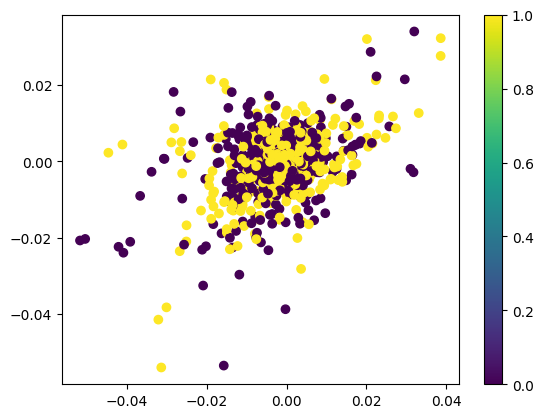

In [ ]:
# your code here
latent_points = []
for batch in dataloader:
    batch = batch[0]
    with torch.no_grad():
        _, mean, _ = vae(batch)
        latent_points.append(mean)
latent_points = torch.cat(latent_points).numpy()

plt.scatter(latent_points[:, 0], latent_points[:, 1], c=label, cmap='viridis')
plt.colorbar()
plt.show()

----
# **Problem 2. VAE for faec images (10 points)**

This problem will ask you to implement the autoencoder algorithm for face data. You can choose various dimension of latent space or various architectures for your network. The given data consists of 100 pictures of human faces with size of (50, 40), we will apply an autoencoder to this dataset.

<br>


__Data information__
- File format: npy
- Information: face

<br>

__Downlaod the datasets__
- [pca_faces](https://drive.google.com/file/d/1fqy3zZos2ac8c3b_dFLKqpXdJVKy1uMh/view?usp=sharing)
<br>

**Please download them and upload on Colab to write your Python code**

### 01. Visualize one random face out of 100 faces.

You might want to run multiple times to see what kinds of faces are in the dataset.

(100, 50, 40)


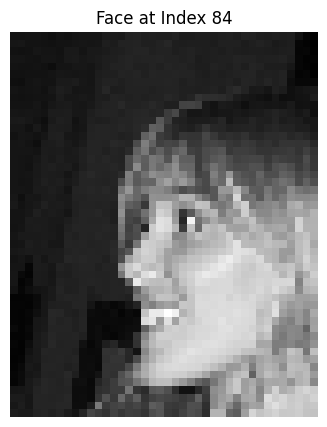

In [2]:
# your code here
import torch
import torch.nn as nn
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
faces = np.load('/content/sample_data/pca_faces.npy')

print(faces.shape)

# Randomly select one face
random_index = np.random.randint(0, 100)  # Select a random index between 0 and 99
random_face = faces[random_index]  # Extract the face at the random index

# Visualize the face
plt.figure(figsize=(5, 5))
plt.imshow(random_face, cmap='gray')  # Display the face as a grayscale image
plt.title(f"Face at Index {random_index}")
plt.axis('off')  # Turn off the axes
plt.show()



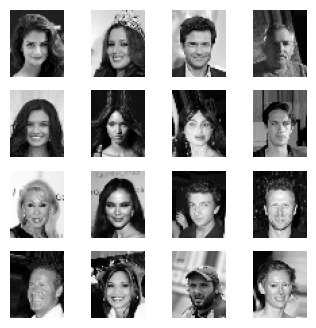

In [ ]:
faces_random_grid = [np.random.randint(0, 100) for i in range(16)]
plt.figure(figsize=(4,4))
for i, index in enumerate(faces_random_grid):
  plt.subplot(4,4,i+1)
  plt.imshow(faces[index], cmap='gray')
  plt.axis('off')
plt.show()

### 02. Build your variational autoencoder and proceed with the training process.

In [33]:
# your code here
class VAE2(nn.Module):
    def __init__(self, latent_dim=16):
        super(VAE2, self).__init__()
        input_dim = 50 * 40
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, latent_dim * 2)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear( 256,512),
            nn.ReLU(),
            nn.Linear(512, input_dim),
            nn.Sigmoid()
        )
    def forward(self, x):
        encoded = self.encoder(x)
        mean, log_var = encoded.chunk(2, dim=-1)
        z = mean + torch.exp(0.5 * log_var) * torch.randn_like(mean)
        reconstructed = self.decoder(z)
        return reconstructed, mean, log_var

def loss_function(reconstructed, original, mean, log_var):
  mse = nn.MSELoss(reduction = 'mean')(reconstructed, original)
  kl_div = -0.5 * torch.mean(1 + log_var - mean.pow(2) - log_var.exp())
  return mse + kl_div
# 데이터 준비
faces = faces / 255.0
faces_tensor = torch.tensor(faces, dtype=torch.float32)
faces_tensor = faces_tensor.view(faces_tensor.size(0), -1)
dataloader = DataLoader(TensorDataset(faces_tensor), batch_size=64, shuffle=True)

# 모델 학습
vae2 = VAE2(latent_dim=2)
optimizer = optim.Adam(vae2.parameters(), lr=1e-4)

for epoch in range(50):
    epoch_loss = 0
    for batch in dataloader:
        batch = batch[0]
        optimizer.zero_grad()
        reconstructed, mean, log_var = vae2(batch)
        loss = loss_function(reconstructed, batch, mean, log_var)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")


Epoch 1, Loss: 0.5007
Epoch 2, Loss: 0.4947
Epoch 3, Loss: 0.4886
Epoch 4, Loss: 0.4822
Epoch 5, Loss: 0.4761
Epoch 6, Loss: 0.4695
Epoch 7, Loss: 0.4598
Epoch 8, Loss: 0.4513
Epoch 9, Loss: 0.4403
Epoch 10, Loss: 0.4319
Epoch 11, Loss: 0.4177
Epoch 12, Loss: 0.4094
Epoch 13, Loss: 0.3889
Epoch 14, Loss: 0.3794
Epoch 15, Loss: 0.3712
Epoch 16, Loss: 0.3503
Epoch 17, Loss: 0.3332
Epoch 18, Loss: 0.3143
Epoch 19, Loss: 0.2960
Epoch 20, Loss: 0.2712
Epoch 21, Loss: 0.2481
Epoch 22, Loss: 0.2432
Epoch 23, Loss: 0.2091
Epoch 24, Loss: 0.2020
Epoch 25, Loss: 0.1845
Epoch 26, Loss: 0.1605
Epoch 27, Loss: 0.1392
Epoch 28, Loss: 0.1409
Epoch 29, Loss: 0.1118
Epoch 30, Loss: 0.1013
Epoch 31, Loss: 0.0872
Epoch 32, Loss: 0.0778
Epoch 33, Loss: 0.0729
Epoch 34, Loss: 0.0579
Epoch 35, Loss: 0.0568
Epoch 36, Loss: 0.0516
Epoch 37, Loss: 0.0422
Epoch 38, Loss: 0.0427
Epoch 39, Loss: 0.0369
Epoch 40, Loss: 0.0338
Epoch 41, Loss: 0.0281
Epoch 42, Loss: 0.0250
Epoch 43, Loss: 0.0231
Epoch 44, Loss: 0.02

### 03. Visualize randomly selected input image alongside its corresponding reconstructed image.

In [34]:
# GPU 사용 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 모델을 GPU로 이동
vae2 = vae2.to(device)
# 데이터도 GPU로 이동
pt_train_x = faces_tensor.to(device)
pt_train_x.shape

torch.Size([100, 2000])

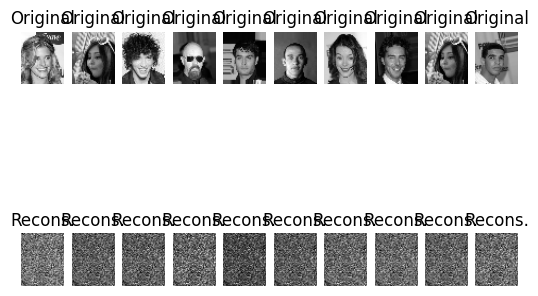

In [29]:
vae2.eval()  # 모델을 평가 모드로 전환
with torch.no_grad():
    # 테스트 데이터 (예: 전체 학습 데이터의 10개 샘플)
    rand_indices = np.random.randint(0, len(pt_train_x), 10)  # 10개의 랜덤 샘플 선택
    sample_x = pt_train_x[rand_indices].to(device)  # 랜덤 샘플 추출
    reconstructed, mean, log_var = vae2(sample_x)  # VAE 모델을 통해 재구성

    # 재구성된 데이터 확인
    reconstructed = reconstructed.cpu().numpy()  # CPU로 이동 후 NumPy 배열로 변환
    sample_x = sample_x.cpu().numpy()  # 원본 데이터도 NumPy로 변환

    # 시각화
    for i in range(10):  # 10개의 샘플
        plt.subplot(2, 10, i + 1)
        plt.imshow(sample_x[i].reshape(50, 40), cmap='gray')  # 원본 이미지
        plt.axis('off')
        plt.title('Original')

        plt.subplot(2, 10, i + 11)
        plt.imshow(reconstructed[i].reshape(50, 40), cmap='gray')  # 재구성된 이미지
        plt.axis('off')
        plt.title('Recons.')

    plt.show()


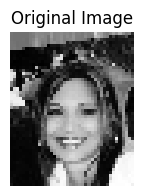

RuntimeError: shape '[50, 40]' is invalid for input of size 200000

In [30]:
# your code here
random_index = np.random.randint(0, 100)
plt.figure(figsize=(2, 2))
plt.imshow(faces[random_index], cmap='gray')  # Display the face as a grayscale image
plt.title("Original Image")
plt.axis('off')  # Turn off the axes
plt.show()
#random_face = faces[random_index]  # Extract the original face
#random_face_tensor = torch.tensor(random_face, dtype=torch.float32).view(-1)
vae2.eval()  # Set the model to evaluation mode
with torch.no_grad():
    reconstructed, _, _ = vae2(pt_train_x.unsqueeze(0))  # Add batch dimension and reconstruct
reconstructed_face = reconstructed.squeeze().view(50, 40).numpy()
plt.imshow(reconstructed_face, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_face, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')

plt.show()



RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x2000 and 10000x128)

recontructed face image is

In [ ]:

with torch.no_grad():
  x_recons, _, _ = vae(pt_train_x.to(device))
  x_recons = x_recons.cpu()

gs = gridspec.GridSpec(2,10, wspace=0.1, hspace=0.1)
rand_indices = np.random.randint(0, 100, 10)
plt.figure(figsize=(15,4))
for i, sample_index in enumerate(rand_indices):
  plt.subplot(gs[0,i])
  plt.imshow(pt_train_x[sample_index, 0], cmap='gray')
  plt.title('Original')
  plt.xticks([])
  plt.yticks([])
  plt.subplot(gs[1,i])
  plt.imshow(x_recons[sample_index,0], cmap='gray')
  plt.title('Recons.')
  plt.xticks([])
  plt.yticks([])
plt.show()

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)